   Month  Day  Year     F
0      1    1  1995  32.3
1      1    2  1995  31.7
2      1    3  1995  26.8
3      1    4  1995  15.9
4      1    5  1995  23.8


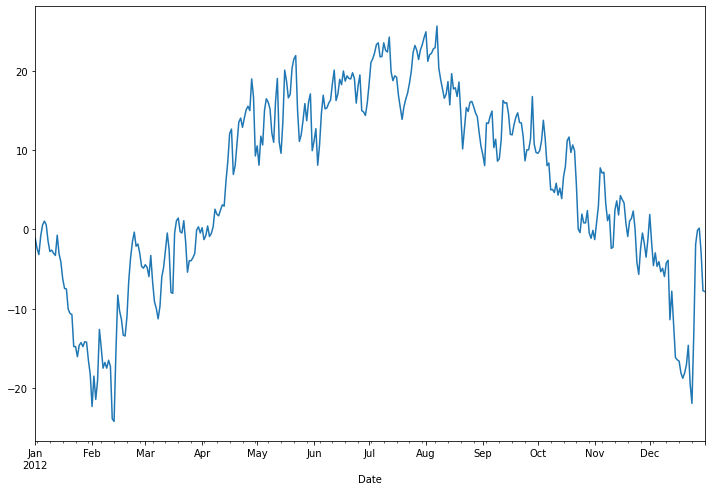

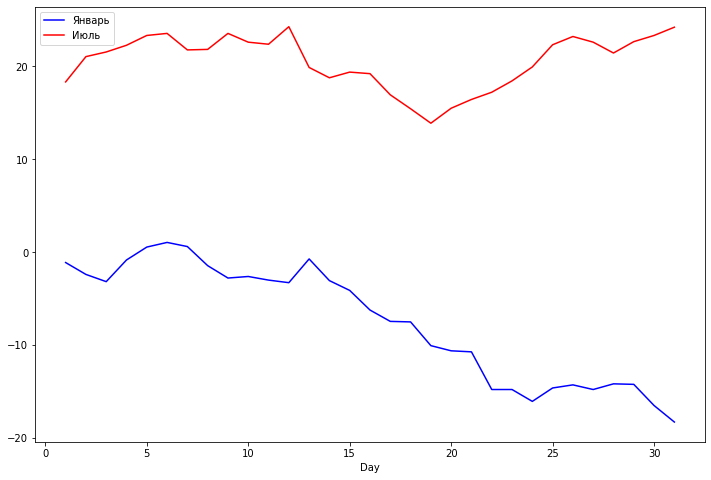

In [7]:
#серии данных

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,8
data = pd.read_csv("http://digo.ee/weather-moscow.txt", delimiter="\t", names=["Month", "Day", "Year", "F"])
print (data.head())

data["Date"] = data.astype(str).Year + "-" + data.astype(str).Month + "-" + data.astype(str).Day
data["C"] = (data["F"] - 32)/1.8
data = data.set_index("Date")
data.index = pd.to_datetime(data.index)
data["C"]["2012-01":"2012-12"].plot()
plt.show()

#данные за январь и июль на одном графике что-бы сравнить
#назначим индекс по дню месяца
data.loc["2012-01"].reset_index().set_index("Day")["C"].plot(color="blue", label="Январь")
data.loc["2012-07"].reset_index().set_index("Day")["C"].plot(color="red", label="Июль")

#Выведем легенду на графике
plt.legend()

plt.show()

   Month  Day  Year     F
0      1    1  1995  32.3
1      1    2  1995  31.7
2      1    3  1995  26.8
3      1    4  1995  15.9
4      1    5  1995  23.8


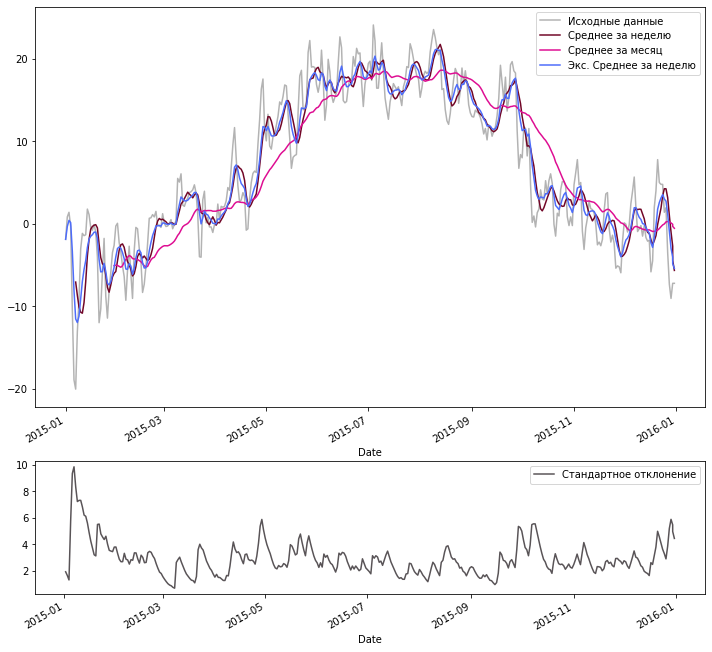

In [15]:
#скользящие средние и отклонения

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig = plt.figure(figsize=(12, 12))
(area1, area2) = fig.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

#rcParams['figure.figsize'] = 12,8
data = pd.read_csv("http://digo.ee/weather-moscow.txt", delimiter="\t", names=["Month", "Day", "Year", "F"])
print (data.head())

#выполняем ретроспективный анализ
data["Date"] = pd.to_datetime(data.astype(str).Year + "-" + 
                data.astype(str).Month + "-" + 
                data.astype(str).Day)
data["C"] = (data["F"] - 32)/1.8
data = data.set_index("Date")
data["C"]["2015"].plot(ax=area1, color=".7", label="Исходные данные")
data["C"]["2015"].rolling(window=7).mean().plot(ax=area1, color="#710627", label="Среднее за неделю")
data["C"]["2015"].rolling(window=30).mean().plot(ax=area1, color="#DE0D92", label="Среднее за месяц")

#воспользуемся экспоненциальным средним (назначает больше веса недавноим значениям и меньше старым)
#в большинстве случаев именно экспоненциальное среднее помогает предсказывать ТРЕНДЫ
data["C"]["2015"].ewm(span=7).mean().plot(ax=area1, color="#4D6CFA", label="Экс. Среднее за неделю")
area1.legend()
data["C"]["2015"].ewm(span=7).std().plot(ax=area2, color="#595457", label="Стандартное отклонение")
area2.legend()
plt.show()


In [19]:
# свечные графики

import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

open_data = [33.0, 33.3, 33.5]
high_data = [33.1, 33.3, 33.6]
low_data = [32.7, 32.7, 32.8]
close_data = [33.0, 32.9, 33.3]
dates = [datetime(year=2018, month=10, day=10),
        datetime(year=2018, month=11, day=10),
        datetime(year=2018, month=12, day=10)]
fig = go.Figure(data = [go.Candlestick(x = dates,
                        open = open_data, high = high_data,
                                      low = low_data, close = close_data)])



"""
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

open_data = [33.0, 33.3, 33.5]
high_data = [33.1, 33.3, 33.6]
low_data = [32.7, 32.7, 32.8]
close_data = [33.0, 32.9, 33.3]
dates = [datetime(year=2018, month=10, day=10),
        datetime(year=2018, month=11, day=10),
        datetime(year=2018, month=12, day=10)]
fig = go.Figure(data = [go.Candlestick(x = dates,
                        open = open_data, high = high_data,
                        low = low_data, close = close_data)])
fig.show()

data = pd.read_csv("https://video.ittensive.com/python-advanced/finance-charts-apple.csv")
fig = go.Figure(data = [go.Candlestick(x = data['Date'],
                       open = data['AAPL.Open'], high = data['AAPL.High'],
                        low = data['AAPL.Low'], close = data['AAPL.Close'])])
fig.show()
"""

'\nimport plotly.graph_objects as go\nimport pandas as pd\nfrom datetime import datetime\n\nopen_data = [33.0, 33.3, 33.5]\nhigh_data = [33.1, 33.3, 33.6]\nlow_data = [32.7, 32.7, 32.8]\nclose_data = [33.0, 32.9, 33.3]\ndates = [datetime(year=2018, month=10, day=10),\n        datetime(year=2018, month=11, day=10),\n        datetime(year=2018, month=12, day=10)]\nfig = go.Figure(data = [go.Candlestick(x = dates,\n                        open = open_data, high = high_data,\n                        low = low_data, close = close_data)])\nfig.show()\n\ndata = pd.read_csv("https://video.ittensive.com/python-advanced/finance-charts-apple.csv")\nfig = go.Figure(data = [go.Candlestick(x = data[\'Date\'],\n                       open = data[\'AAPL.Open\'], high = data[\'AAPL.High\'],\n                        low = data[\'AAPL.Low\'], close = data[\'AAPL.Close\'])])\nfig.show()\n'